In [ ]:
from collections import defaultdict
import nltk
from nltk import stem

snowball = stem.snowball.EnglishStemmer()


In [ ]:
class Splitter(object):
    def __init__(self):
        self.nltk_splitter = nltk.data.load('tokenizers/punkt/english.pickle')
        self.nltk_tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self, text):
        """
        input format: a paragraph of text
        output format: a list of lists of words.
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        """
        sentences = self.nltk_splitter.tokenize(text)
        tokenized_sentences = [self.nltk_tokenizer.tokenize(sent) for sent in sentences]
        return tokenized_sentences

class POSTagger(object):
    def __init__(self):
        pass
        
    def pos_tag(self, sentences):
        """
        input format: list of lists of words
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        output format: list of lists of tagged tokens. Each tagged tokens has a
        form, a lemma, and a list of tags
            e.g: [[('this', 'this', ['DT']), ('is', 'be', ['VB']), ('a', 'a', ['DT']), ('sentence', 'sentence', ['NN'])],
                    [('this', 'this', ['DT']), ('is', 'be', ['VB']), ('another', 'another', ['DT']), ('one', 'one', ['CARD'])]]
        """

        pos = [nltk.pos_tag(sentence) for sentence in sentences]
        #adapt format
        pos = [[(word, word, [postag]) for (word, postag) in sentence] for sentence in pos]
        return pos

In [ ]:
splitter = Splitter()
postagger = POSTagger()

In [ ]:
splitted_sentences = splitter.split(text)
pos_tagged_sentences = postagger.pos_tag(splitted_sentences)

In [ ]:
stem_words = defaultdict(list)

for k, v in pos_dict.items():
    stem_words[snowball.stem(k)].append((k, v))

stem_words['nice']

In [ ]:
#Use sorted dictionaries?
#pos_dict_sorted = OrderedDict(sorted(pos_dict.items(), key=lambda t: t[0]))
#neg_dict_sorted = OrderedDict(sorted(neg_dict.items(), key=lambda t: t[0]))

In [ ]:
#### SentiWordNet lexicons
import json
# json.dump(pos_dict, open("dicts/pos_dict", 'w'))
# json.dump(neg_dict, open("dicts/neg_dict", 'w'))

pos_dict = defaultdict(int, json.load(open('dicts/pos_dict')))
neg_dict = defaultdict(int, json.load(open('dicts/neg_dict')))

In [1]:
import xmltodict

with open('sentiment.xml') as fd:
    obj = xmltodict.parse(fd.read())

In [14]:
words = []
polarity = []
for i in obj['sentiment']['word']:
    words.append(i['@form'])
    polarity.append(i['@polarity'])

In [15]:
from itertools import *

In [18]:
pattern_dict = pd.DataFrame(list(izip(words, polarity)))
pattern_dict.columns = ['Word', 'Polarity']

In [23]:
from nltk.tokenize import word_tokenize
import nltk.pos_tag
text = word_tokenize("And now for something completely different")
nltk.data.load(nltk.tag._POS_TAGGER)
nltk.pos_tag(text)

ImportError: No module named pos_tag

In [20]:
#positives = pattern_dict[pattern_dict['Polarity'] <]

In [ ]:
def cal_senti_score(pos_tagged_sentences):
    incrementers = ['too', 'very', 'sorely', 'painfully', 'greatly', 'woefully', 'extremely', 'greatly', 'more']
    decrementers = ['barely', 'little', 'less', 'hardly', 'scarcely', 'rarely']
    
    score = []
    
    for sent in pos_tagged_sentences:
        pos_score = []
        neg_score = []
        total = len(sent)
  
        for i, token in enumerate(sent):    
            if pos_dict.get(token[0]) == None:
                pass
            if i == 0:
                pos_score.append(pos_dict[token[0]])
            else:
                previous_token = sent[i-1][0]

                if previous_token in incrementers:
                        pos_score.append(pos_dict[token[0]]*2.)

                elif previous_token in decrementers:

                    pos_score.append(pos_dict[token[0]]/2.)
                else:
                    pos_score.append(pos_dict[token[0]])
                        
        for i, token in enumerate(sent):    
            if neg_dict.get(token[0]) == None:
                pass
            if i == 0:
                neg_score.append(neg_dict[token[0]])
            else:
                previous_token = sent[i-1][0]
    
                if previous_token in incrementers:
                    neg_score.append(neg_dict[token[0]]*2.)

                elif previous_token in decrementers:

                    neg_score.append(neg_dict[token[0]]/2.)
                else:
                    neg_score.append(neg_dict[token[0]])

        sent_score = (sum(pos_score) - sum(neg_score)) / float(total) 
        print pos_score
        print neg_score
    
        score.append(sent_score)
    return sum(score) / float(len(score))

In [ ]:
cal_senti_score(pos_tagged_sentences)

In [ ]:
text ="What can I say about this place. \
The staff of the restaurant is nice and the eggplant is not bad. \
Apart from that, very uninspired food, lack of atmosphere and too expensive. \
I am a staunch vegetarian and was sorely dissapointed with the veggie options on the menu. \
Will be the last time I visit, I recommend others to avoid."

### Using PATTERN

In [52]:
from pattern.en import sentiment, polarity, subjectivity
def sentiment(text):
    return polarity(text)

def subj(text):
    return subjectivity(text)

hilary = pd.read_csv('data/hilary_comments')
hilary['Sentiment'] = hilary.apply(lambda row: sentiment(row['Comment']), axis = 1)
hilary['Subjectivity'] = hilary.apply(lambda row: subj(row['Comment']), axis = 1)
hilary.to_csv('hilary_scores')

sanders = pd.read_csv('data/sanders_comments')
sanders['Sentiment'] = sanders.apply(lambda row: sentiment(row['Comment']), axis = 1)
sanders['Subjectivity'] = sanders.apply(lambda row: subj(row['Comment']), axis = 1)
sanders.to_csv('sanders_scores')
#df['Value'] = df.apply(lambda row: my_test(row['a'], row['c']), axis=1)
#hilary['Binary'] = hilary['Sentiment']

In [57]:
biden = pd.read_csv('data/biden_comments')
biden['Sentiment'] = biden.apply(lambda row: sentiment(row['Comment']), axis = 1)
biden['Subjectivity'] = biden.apply(lambda row: subj(row['Comment']), axis = 1)
biden.to_csv('biden_scores')

In [58]:
trump = pd.read_csv('data/trump_comments')
trump['Sentiment'] = trump.apply(lambda row: sentiment(row['Comment']), axis = 1)
trump['Subjectivity'] = trump.apply(lambda row: subj(row['Comment']), axis = 1)
trump.to_csv('trump_scores')

In [59]:
bush = pd.read_csv('data/bush_comments')
bush['Sentiment'] = bush.apply(lambda row: sentiment(row['Comment']), axis = 1)
bush['Subjectivity'] = bush.apply(lambda row: subj(row['Comment']), axis = 1)
bush.to_csv('bush_scores')

In [60]:
carson = pd.read_csv('data/carson_comments')
carson['Sentiment'] = carson.apply(lambda row: sentiment(row['Comment']), axis = 1)
carson['Subjectivity'] = carson.apply(lambda row: subj(row['Comment']), axis = 1)
carson.to_csv('carson_scores')

In [35]:
hilary['Comment'][1046]

"Bush dynasty goes back to Prescott Bush, a senator for CT in 1950.  G.H.W. Bush, Jeb, and George W. have all held elective office since the 1970 through 2008.<br/><br/>The Clinton dynasty is Bill Clinton as governor of Arkansas, then President.  Hillary was elected to the Senate from NY in 2000.  That's it.<br/><br/>There is no Clinton dynasty."

In [ ]:
def binarizer(dataframe):
    data = pd.read_csv('data/'+ dataframe +'_comments')

In [95]:
for c in candidates:
    data = pd.read_csv('data/'+c+'_comments')
    data['Sentiment'] = data.apply(lambda row: sentiment(row['Comment']), axis = 1)
    data['Sentiment_b'] = data['Sentiment'] >= 0
    data['Sentiment_b'] = data['Sentiment_b'].astype(int) 
    data['Subjectivity'] = data.apply(lambda row: subj(row['Comment']), axis = 1)
    data['Subjectivity_b'] = data['Subjectivity'] >= 0
    data['Subjectivity_b'] = data['Subjectivity_b'].astype(int) 
    data.to_csv('data/'+c+'_scores.csv')

In [113]:
candidates = ['hilary', 'sanders', 'biden', 'trump', 'bush', 'carson']

In [117]:
for c in candidates:
    # exec c + " = pd.read_csv('data/'+c+'_scores.csv')"

In [121]:
hilary = pd.read_csv('data/hilary_scores.csv')

In [135]:
##Example
print hilary.ix[2314].values
print hilary.ix[644].values

[2314 2314
 ' This scam has been used for over fifty years an coincides perfectly with the rise of income inequality.'
 'http://www.nytimes.com/2015/07/18/opinion/capitalism-for-the-rest-of-us.html'
 1.0 1 1.0 1]
[644 644
 "If she can't even run, now her 2dn a campaign for president,  how in the heck can anyone think she can run a country? She's a horrible embarrassment.  Go home and retire already."
 'http://www.nytimes.com/2015/09/08/us/politics/hillary-clinton-to-show-more-humor-and-heart-aides-say.html'
 -1.0 0 1.0 1]


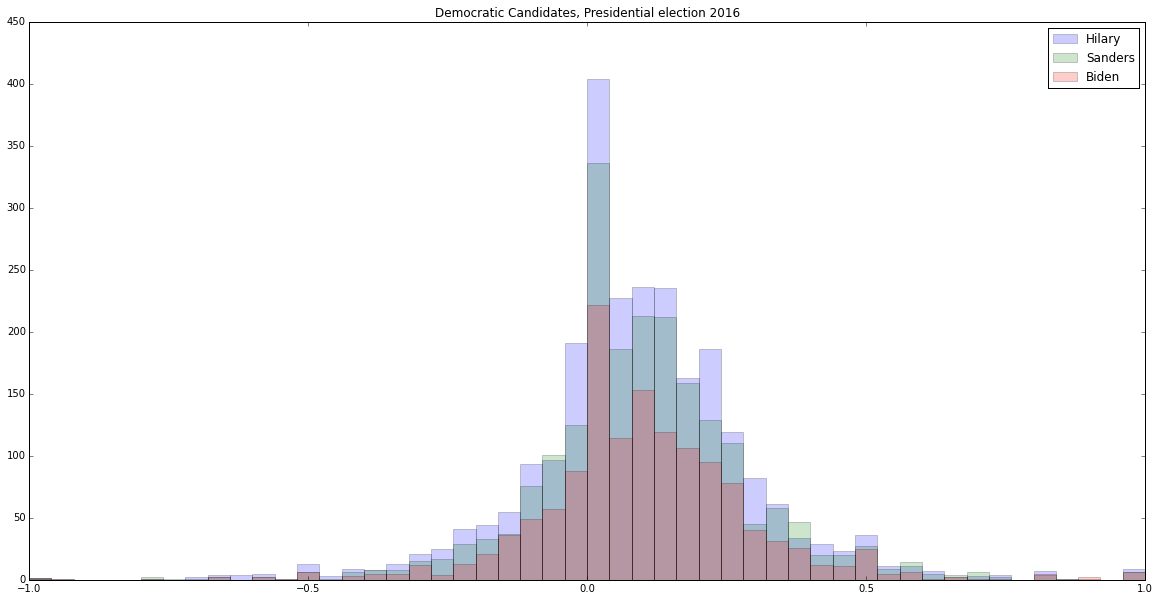

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.hist(hilary['Sentiment'], bins = 50, alpha = 0.2, label = 'Hilary')
plt.hist(sanders['Sentiment'], bins = 50, alpha = 0.2, label = 'Sanders')
plt.hist(biden['Sentiment'], bins = 50, alpha = 0.2, label = 'Biden')
plt.legend(loc='upper right')
plt.title('Democratic Candidates, Presidential election 2016')

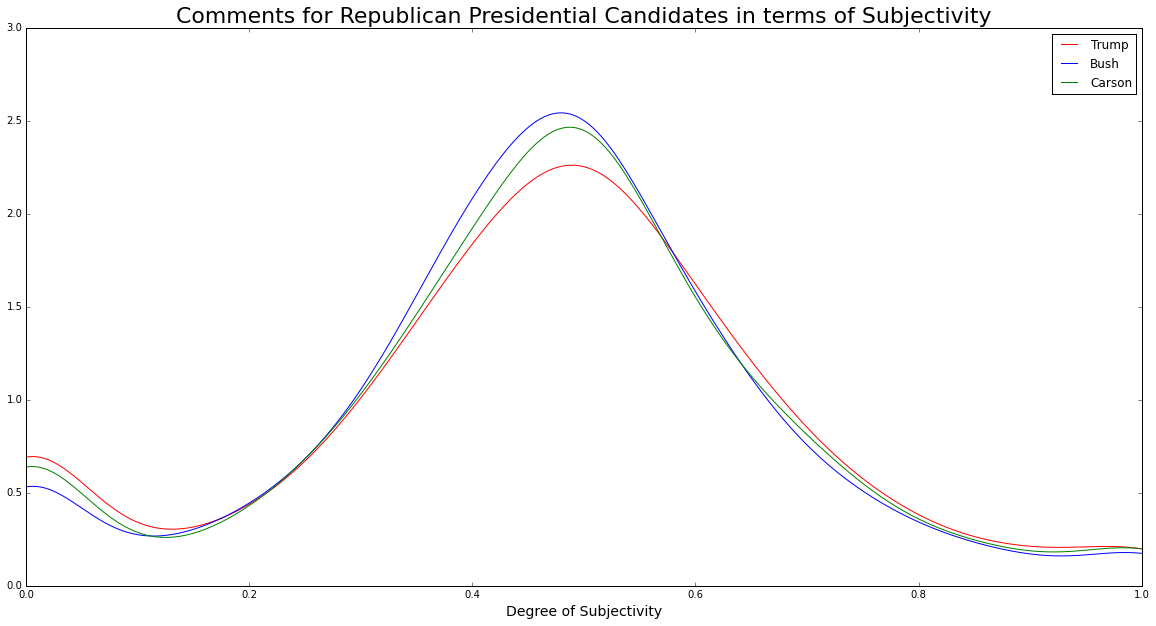

In [133]:
from scipy.stats import gaussian_kde
plt.figure(figsize=(20,10))

data = trump['Subjectivity']
density = gaussian_kde(data)
xs = np.linspace(0,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), color = 'r', label = 'Trump')

data1 = bush['Subjectivity']
density1 = gaussian_kde(data1)
density1.covariance_factor = lambda : .25
density1._compute_covariance()
plt.plot(xs,density1(xs), color = 'b', label = 'Bush')

data2 = carson['Subjectivity']
density2 = gaussian_kde(data2)
density2.covariance_factor = lambda : .25
density2._compute_covariance()
plt.plot(xs,density2(xs), color = 'g', label = 'Carson')
plt.legend(loc='upper right')
plt.xlabel('Degree of Subjectivity', fontsize=14)
plt.title('Comments for Republican Presidential Candidates in terms of Subjectivity', fontsize=22)

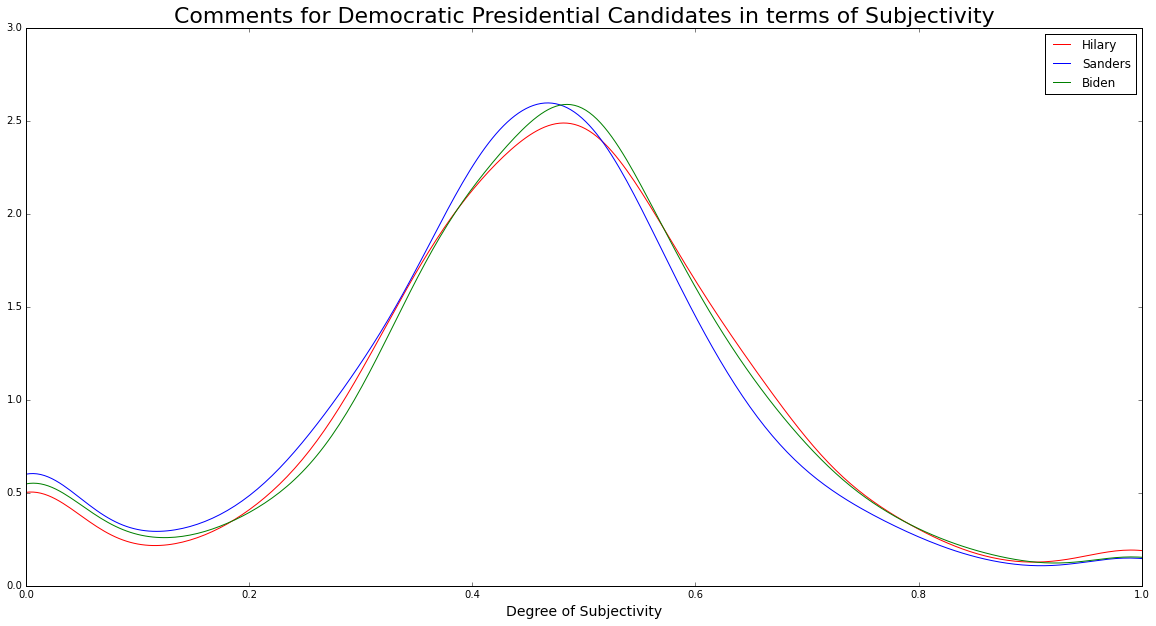

In [134]:
from scipy.stats import gaussian_kde
plt.figure(figsize=(20,10))

data = hilary['Subjectivity']
density = gaussian_kde(data)
xs = np.linspace(0,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), color = 'r', label = 'Hilary')

data1 = sanders['Subjectivity']
density1 = gaussian_kde(data1)
density1.covariance_factor = lambda : .25
density1._compute_covariance()
plt.plot(xs,density1(xs), color = 'b', label = 'Sanders')

data2 = biden['Subjectivity']
density2 = gaussian_kde(data2)
density2.covariance_factor = lambda : .25
density2._compute_covariance()
plt.plot(xs,density2(xs), color = 'g', label = 'Biden')
plt.legend(loc='upper right')
plt.xlabel('Degree of Subjectivity', fontsize=14)
plt.title('Comments for Democratic Presidential Candidates in terms of Subjectivity', fontsize=22)

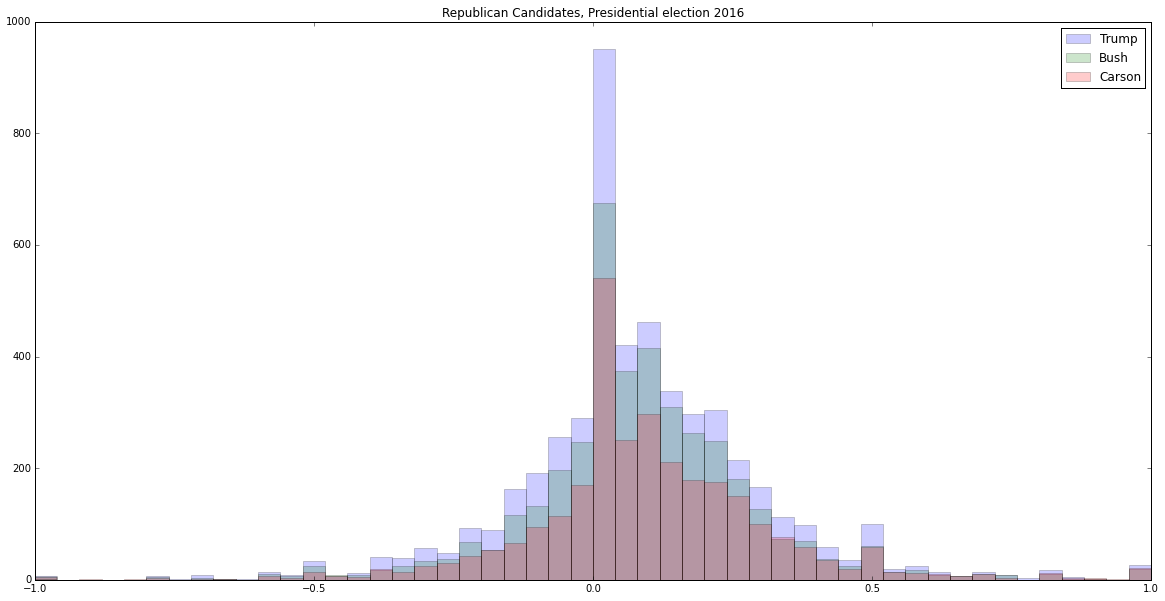

In [72]:
plt.figure(figsize=(20,10))
plt.hist(trump['Sentiment'], bins = 50, alpha = 0.2, label = 'Trump')
plt.hist(bush['Sentiment'], bins = 50, alpha = 0.2, label = 'Bush')
plt.hist(carson['Sentiment'], bins = 50, alpha = 0.2, label = 'Carson')
plt.legend(loc='upper right')
plt.title('Republican Candidates, Presidential election 2016')

(array([ 151.,   16.,   27.,   19.,   74.,  105.,  167.,  258.,  283.,
         336.,  333.,  242.,  150.,  150.,   45.,   59.,   27.,    8.,
          18.,   54.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

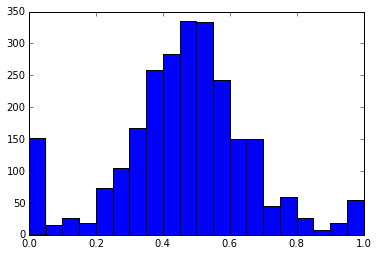

In [71]:
plt.hist(hilary['Subjectivity'], bins = 20)

In [27]:
hilary['Comment'][1697]


'Why America Is Not the Greatest Country in the World!<br/><br/>YouTube:<br/>" The Newsroom "America is not the greatest country in the world anymore" 2012 TV series "'

In [26]:
hilary['URL'][1697]

'http://www.nytimes.com/2015/07/16/world/middleeast/obama-diplomacy-iran-nuclear-deal.html'

In [59]:
url = 'http://www.nytimes.com/2015/07/16/world/middleeast/obama-diplomacy-iran-nuclear-deal.html'
table = hilary[['Comment', 'Sentiment', 'Subjectivity']][hilary['URL'] == url]
table.head()

,Comment,Sentiment,Subjectivity
313,Obama and the Democrats need to remind the pub...,0.026786,0.558333
314,Iran realizes that having a bomb is really not...,0.055357,0.505867
315,After listening on C-Span to the nuclear exper...,0.125000,0.491429
316,The key question is. How effective are the me...,0.082143,0.653571
317,"The reality, Iran is and will continue to be a...",-0.033631,0.282738


In [64]:
table.ix[317].values

array([ 'The reality, Iran is and will continue to be a major power in the region.  The U.S. policy of invasion and occupation has proven disastrous.  For all the criticism of this deal what was the alternative? The present day Iran is not the same Iran of 30 years ago and hopefully, through international prodding and internal societal adjustment by the Iranian people, Iran might be a country that is more accepting of western values and less theocratic.  The deal works both ways and it is a leap of faith for both sides (US and Iran). Yes Israel and Arab states should be concerned but it must also realize the current US approach in the region has made these countries more than less vulnerable.  The deal is a viable alternative to the US adventurism in the region and the countless lives lost and ruined by the Iraq and Afghanistan invasions.',
       -0.033630952380952372, 0.28273809523809523], dtype=object)

In [86]:
text = "It takes breathtaking cynicism to send out 11 million cars that you KNOW pollute worse than a heavy truck as the clock is ticking on climate destruction. Do none of the people responsible for this crime have children or grandchildren? Did they get extra enjoyment out of the fraud, knowing that many people bought these cars precisely because they wanted to do their small bit for the environment? Volkswagen needs to pay till it hurts, to teach them and other arrogant, cynical companies the lesson that there's a heavy price to pay for breaking the rules. We have never been litigious, never once considered joining a class-action lawsuit - but we will be first in line on this one."
print sentiment(text)
print subjectivity(text)

0.0479166666667
0.554861111111


In [73]:
print sentiment("This is amazingly")
print sentiment("This is bad")

0.6
-0.7
